In [11]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [12]:
music


,duration,loudness,bpm
0,184,18,105
1,134,34,90
2,243,43,78
3,186,36,75
4,122,22,120
5,197,9,110
6,294,29,80
7,382,22,100
8,102,10,105
9,264,24,60


In [30]:
len(np.arange(0,3,0.1)[:,np.newaxis])

30

    loudness  duration
0         18       184
1         34       134
2         43       243
3         36       186
4         22       122
5          9       197
6         29       294
7         22       382
8         10       102
9         24       264
10        20       205
11        10       110
12        17       307
13        51       110
14         7       397
15        13       153
16        19       190
17        12       192
18        21       210
19        22       403
20        16       164
21        18       198
22         4       204
23        23       253
24        34       234
25        19       190
26        14       182
27        11       401
28        37       376
29        42       102
0     105
1      90
2      78
3      75
4     120
5     110
6      80
7     100
8     105
9      60
10     70
11    105
12     95
13     70
14     90
15    105
16     70
17     75
18    102
19    100
20    100
21     95
22     90
23     80
24     90
25     80
26    100
27    105
28     

ValueError: x and y must be the same size

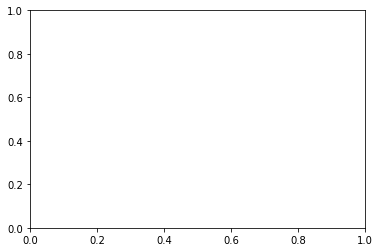

In [42]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10,weights='distance')
X1 = pd.DataFrame(music.loudness)
X2 = pd.DataFrame(music.duration)
X = pd.concat([X1,X2],axis=1)

print(X)
Y = music.bpm
model1=knn.fit(X, Y)
print(Y)

# Set up our prediction line.
T = np.arange(0, 6, 0.1)[:, np.newaxis]
T = T.reshape(30,2)
print(len(T))
# Trailing underscores are a common convention for a prediction.
Y_ = model1.predict(T)
print(Y_)



plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))